In [1]:
from PP import pebble_predictor
import numpy as np
from astropy import constants as c
import matplotlib.pyplot as plt

In [2]:
# some useful constants in cgs
year = 365.25*24*3600
au = c.au.cgs.value
MS = c.M_sun.cgs.value
ME = c.M_earth.cgs.value

### Setup your disk (in cgs units)

In [3]:
# radial grid
Nr = 300 # number of grid points
Rin = 1.*au
Rout = 1000.*au
rgrid = np.logspace(np.log10(Rin),np.log10(Rout),Nr)
msolids = 650.*ME # initial mass of solids
Z0 = 0.01 # solids-to-gas ratio
mdisk = msolids/Z0 # gas disk mass
rout = 30.*au # critical radius of the disk
SigmaGas = mdisk / (2.*np.pi*rout**2.) * (rgrid/rout)**(-1.) * np.exp(-1.*(rgrid/rout)) # gas surface density
SigmaDust = Z0*SigmaGas # dust surface density
T = 280 * (rgrid/au)**(-0.5) # temperature profile
alpha = 1.e-4 # turbulence strength parameter 
vfrag = 1000. # fragmentation threshold velocity 
rhop = 1.25 # internal density of dust grains 

### Plot the disk profile

(1.0, 1000.0)

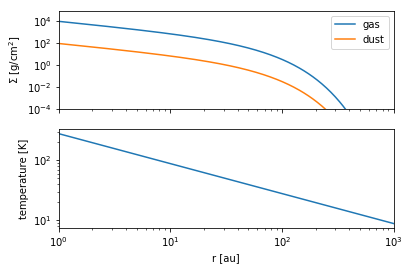

In [17]:
f,ax = plt.subplots(2,1,sharex=True)

ax[0].loglog(rgrid/au,SigmaGas,label='gas')
ax[0].loglog(rgrid/au,SigmaDust,label='dust')
ax[0].set_ylim(1.e-4,)
ax[0].set_ylabel(r'$\Sigma$ [g/cm$^2$]')
ax[0].legend()
ax[1].loglog(rgrid/au,T)
ax[1].set_ylabel('temperature [K]')
ax[1].set_xlabel('r [au]')
ax[1].set_xlim(Rin/au,Rout/au)

### Set time grid

In [18]:
Nt = 1000
endtime = 1.e7*year
timegrid = np.logspace(np.log10(year),np.log10(endtime),Nt)

### Predict the evolution of pebbles

In [5]:
st,flux=pebble_predictor(rgrid=rgrid,tgrid=timegrid,Mstar=MS,SigmaGas=SigmaGas,T=T,SigmaDust=SigmaDust,alpha=alpha,vfrag=vfrag,rhop=rhop)

### Check the pebble flux and Stokes number at a given location

(1000.0, 10000000.0)

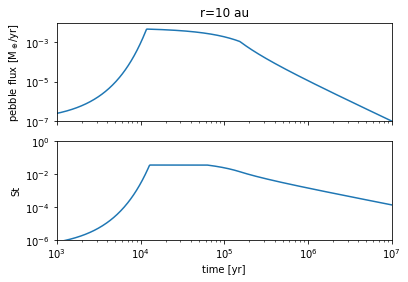

In [6]:
loc = 10.*au # choose location
ir = rgrid.searchsorted(loc)

f,ax = plt.subplots(2,1,sharex=True)

ax[0].loglog(timegrid/year,flux[:,ir]/ME*year)
ax[0].set_ylabel('pebble flux [M$_\oplus$/yr]')
ax[0].set_ylim(1.e-7,1.e-2)
ax[0].set_title('r={:.0f} au'.format(loc/au))
ax[1].loglog(timegrid/year,st[:,ir])
ax[1].set_ylabel('St')
ax[1].set_ylim(1.e-6,1)
ax[1].set_xlabel('time [yr]')
ax[1].set_xlim(1.e3,1.e7)

### Check the pebble flux and Stokes number at a given time point

(1.0, 1000.0)

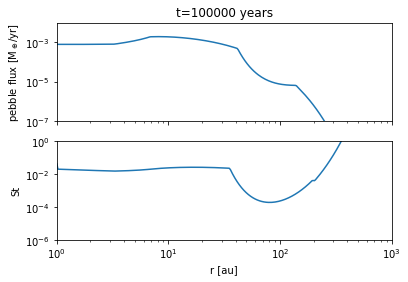

In [7]:
t = 1.e5*year # choose time
it = timegrid.searchsorted(t)

f,ax = plt.subplots(2,1,sharex=True)

ax[0].loglog(rgrid/au,flux[it,:]/ME*year)
ax[0].set_ylabel('pebble flux [M$_\oplus$/yr]')
ax[0].set_ylim(1.e-7,1.e-2)
ax[0].set_title('t={:.0f} years'.format(t/year))
ax[1].loglog(rgrid/au,st[it,:])
ax[1].set_ylabel('St')
ax[1].set_ylim(1.e-6,1)
ax[1].set_xlabel('r [au]')
ax[1].set_xlim(Rin/au,Rout/au)